In [1]:
from __future__ import print_function
import mxnet as mx
from mxnet import autograd, gluon, nd

In [2]:
data_ctx = mx.cpu()
model_ctx = mx.gpu()

In [3]:
num_inputs = 2
num_outputs = 1
num_samples = 10000

def real_fn(X):
    return 2 * X[:, 0] - 3.4 * X[:, 1] + 4.2

X = nd.random_normal(0, 1, shape=(num_samples, num_inputs))
noise = 0.01 * nd.random_normal(0, 1, shape=(num_samples, ))
y = real_fn(X) + noise

In [4]:
y


[ 3.6497705  -0.03050213  5.690765   ...  4.4482083   4.791925
 11.783463  ]
<NDArray 10000 @cpu(0)>

In [5]:
batch_size = 4
train_data = gluon.data.DataLoader(gluon.data.ArrayDataset(X, y), batch_size = batch_size, shuffle=True)

In [6]:
net = gluon.nn.Dense(units=1, in_units=2)

In [8]:
net.collect_params().initialize(mx.init.Normal(sigma=1.), ctx=model_ctx)

D:\Miniconda3\envs\ai-mxnet\lib\site-packages\mxnet\gluon\parameter.py:320: UserWarning: Parameter dense0_weight is already initialized, ignoring. Set force_reinit=True to re-initialize.
  "Set force_reinit=True to re-initialize."%self.name)
D:\Miniconda3\envs\ai-mxnet\lib\site-packages\mxnet\gluon\parameter.py:320: UserWarning: Parameter dense0_bias is already initialized, ignoring. Set force_reinit=True to re-initialize.
  "Set force_reinit=True to re-initialize."%self.name)


In [9]:
net.weight.data()


[[0.85240513 0.7968712 ]]
<NDArray 1x2 @gpu(0)>

In [12]:
square_loss = gluon.loss.L2Loss()

In [11]:
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.0001})

In [18]:
epochs = 10
loss_sequence = []
num_batches = num_samples / batch_size

for epoch in range(epochs):
    cumulative_loss = 0
    for i, (data, label) in enumerate(train_data):
        data = data.as_in_context(model_ctx)
        label = label.as_in_context(model_ctx)
        with autograd.record():
            output = net(data)
            loss = square_loss(output, label)
        loss.backward()
        trainer.step(batch_size)
        cumulative_loss += nd.mean(loss).asscalar()
    print("Epoch %s, loss: %s" % (i, cumulative_loss / num_samples))
    loss_sequence.append(cumulative_loss)

Epoch 2499, loss: 0.8098751582205296


Epoch 2499, loss: 0.4942429648090154


Epoch 2499, loss: 0.3016297574974596


Epoch 2499, loss: 0.1840844695375301


Epoch 2499, loss: 0.11234959704205394


Epoch 2499, loss: 0.06857183683463372


Epoch 2499, loss: 0.041855734346318056


Epoch 2499, loss: 0.025550255438964813


Epoch 2499, loss: 0.01559889790484449


Epoch 2499, loss: 0.009525587576488033


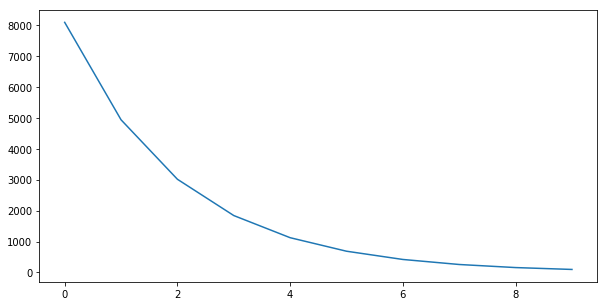

In [19]:
%matplotlib inline

import matplotlib
from matplotlib import pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(loss_sequence)

In [21]:
params = net.collect_params()

for param in params.values():
    print(param.name, param.data())

dense0_weight 


[[ 1.9599249 -3.2290292]]
<NDArray 1x2 @gpu(0)>
dense0_bias 
[4.030414]
<NDArray 1 @gpu(0)>
